In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sys

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

In [2]:
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

In [3]:
df = pd.read_csv('2020.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


## 이진변수 시각화

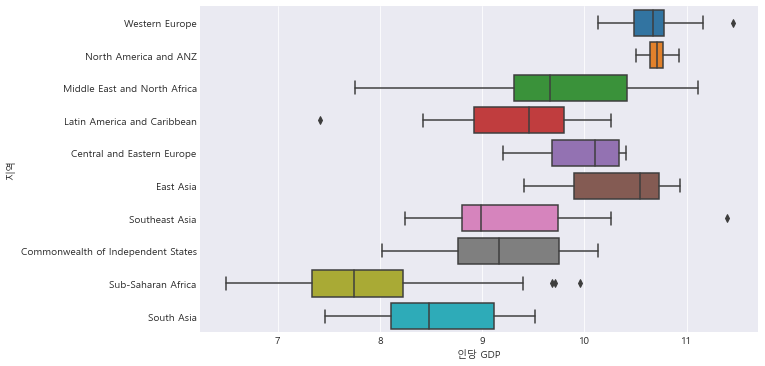

In [4]:
plt.figure(figsize=(10,6))
box=sns.boxplot(x='Logged GDP per capita', y='Regional indicator', data=df)
box.set_xlabel("인당 GDP")
box.set_ylabel("지역")
plt.show()

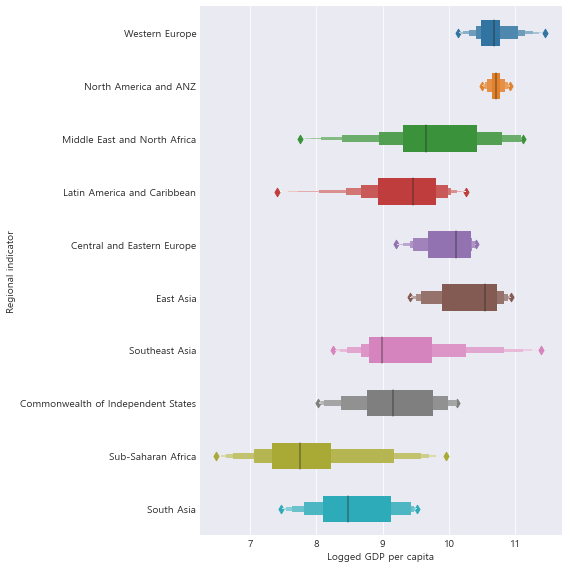

In [22]:
sns.catplot(x='Logged GDP per capita', y='Regional indicator', kind='boxen',data=df, height=8, width=0.5)
plt.show()

### 의미도출
> 인당 GDP가 높은 지역은 median을 기준으로 1. 북아메리카, 2. 서유럽, 3.동아시아였다. 중동과 북아프리카의 분포는 매우 길게 나와 석유를 생산하는 중동국가의 GDP와 북아프리카 국가들의 GDP 사이에 큰 차이가 있음을 예상할 수 있다. 또한, 동남아시아 국가에는 범위에서 크게 벗어난 outlier가 존재하는 것을 볼 수 있다.

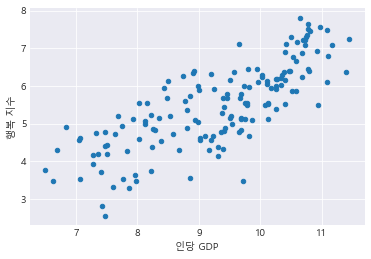

In [23]:
df.plot.scatter(x='Logged GDP per capita', y='Ladder score')
plt.xlabel('인당 GDP')
plt.ylabel('행복 지수')
plt.show()

### 의미도출
> 인당 GDP가 증가할수록 행복지수도 증가하는 관계를 볼 수 있다.

## 3개 이상 변수 시각화

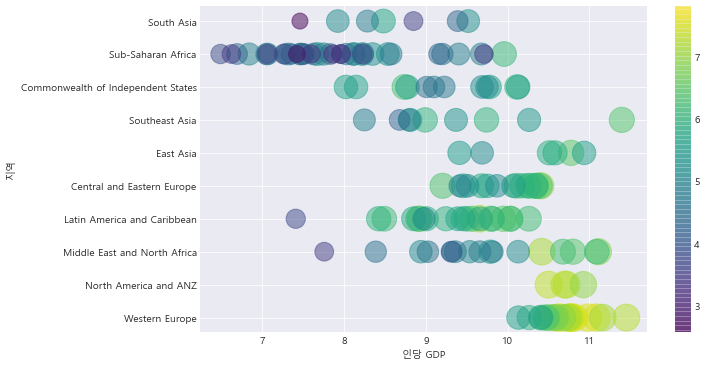

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(df['Logged GDP per capita'], # x축
            df['Regional indicator'], # y축
            c=df['Ladder score'], # 색상
            s=100*df['Ladder score'], # 사이즈 
            alpha=0.5, # 투명도
            cmap='viridis') # 컬러바 종류
plt.colorbar()
plt.ylabel('지역')
plt.xlabel('인당 GDP')
plt.show()

### 의미도출
> 인당 GDP가 높은 국가들의 행복지수가 인당 GDP가 낮은 국가들에 비해 높은 경향을 보이는 것을 확인할 수 있다. 위의 이진변수 그래프에서도 확인할 수 있는 결과를 하나의 표로 정리하면 이렇게 나타낼 수 있다.

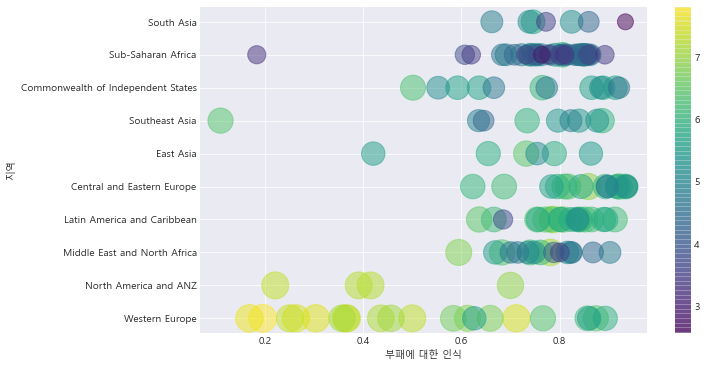

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(df['Perceptions of corruption'], # x축
            df['Regional indicator'], # y축
            c=df['Ladder score'], # 색상
            s=100*df['Ladder score'], # 사이즈 
            alpha=0.5, # 투명도
            cmap='viridis') # 컬러바 종류
plt.colorbar()
plt.ylabel('지역')
plt.xlabel('부패에 대한 인식')
plt.show()

### 의미도출
> 정부 부패에 대한 인식은 0에 가까울수록 부패가 적고, 1에 가까울수록 부패에 대한 사람들의 인식 정도가 심한 것으로 나타난다. 시각화 결과, 서유럽의 경우 어느정도 부패에 대한 인식이 낮을수록 행복지수가 높은 것으로 보이지만, Sub-Saharan Africa 지역의 경우 부패 정도와 관계 없이 행복지수가 낮은 것을 볼 수 있다. 따라서 부패에 대한 인식은 행복지수를 판단하는 데에 인당 GDP에 비해서 큰 설명력을 갖지 못한다.